In [1]:
# 1) load data set (pandas)
# 1) Label Encoding (pandas)
# 2) shufle dataset (pandas)
# 3) split training (70) validation (10) and test (20) %
# 4) Split  inputs and labels (output)
# 5) label one hot coding
# 6) fit model without validation (compare training and testing acuracies)
# 7) fit model wit validation (with history)
# 8) create graph
# 9) Introduce k-fold, as data is limited
# 10) tune nework accuracy by ephoc numbers, change of optimizer,  
# 	bath size, hidden layers, number of nueron, 

In [8]:
import numpy as np
import pandas as pd
import random
import sklearn.preprocessing as pp

# step01 --> select a data set for training and testing
# data_set=pd.read_csv("C:\\Users\\Ahsan Ghaffar\\Desktop\\Git_AI_Work\\AI & Machine Learning Algorithms\\data anaysis\\sonar.csv", header=None)
data_set=pd.read_csv("sonar.csv")

data_set=data_set.sample(frac=1)
data_set.head(5)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
132,0.0790,0.0707,0.0352,0.1660,0.1330,0.0226,0.0771,0.2678,0.5664,0.6609,...,0.0298,0.0390,0.0294,0.0175,0.0249,0.0141,0.0073,0.0025,0.0101,M
30,0.0084,0.0153,0.0291,0.0432,0.0951,0.0752,0.0414,0.0259,0.0692,0.1753,...,0.0236,0.0114,0.0136,0.0117,0.0060,0.0058,0.0031,0.0072,0.0045,R
173,0.0191,0.0173,0.0291,0.0301,0.0463,0.0690,0.0576,0.1103,0.2423,0.3134,...,0.0040,0.0136,0.0137,0.0172,0.0132,0.0110,0.0122,0.0114,0.0068,M
102,0.0162,0.0253,0.0262,0.0386,0.0645,0.0472,0.1056,0.1388,0.0598,0.1334,...,0.0071,0.0082,0.0232,0.0198,0.0074,0.0035,0.0100,0.0048,0.0019,M
184,0.0340,0.0625,0.0381,0.0257,0.0441,0.1027,0.1287,0.1850,0.2647,0.4117,...,0.0141,0.0019,0.0067,0.0099,0.0042,0.0057,0.0051,0.0033,0.0058,M


In [9]:
r_enc = pp.LabelEncoder().fit(data_set['R'])
data_set['R']= r_enc.transform(data_set['R'])

# train_df = train_df.replace(['Setosa', 'Virginica', 'Versicolor'], [0,1,2])

data_set.head(5)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
132,0.0790,0.0707,0.0352,0.1660,0.1330,0.0226,0.0771,0.2678,0.5664,0.6609,...,0.0298,0.0390,0.0294,0.0175,0.0249,0.0141,0.0073,0.0025,0.0101,0
30,0.0084,0.0153,0.0291,0.0432,0.0951,0.0752,0.0414,0.0259,0.0692,0.1753,...,0.0236,0.0114,0.0136,0.0117,0.0060,0.0058,0.0031,0.0072,0.0045,1
173,0.0191,0.0173,0.0291,0.0301,0.0463,0.0690,0.0576,0.1103,0.2423,0.3134,...,0.0040,0.0136,0.0137,0.0172,0.0132,0.0110,0.0122,0.0114,0.0068,0
102,0.0162,0.0253,0.0262,0.0386,0.0645,0.0472,0.1056,0.1388,0.0598,0.1334,...,0.0071,0.0082,0.0232,0.0198,0.0074,0.0035,0.0100,0.0048,0.0019,0
184,0.0340,0.0625,0.0381,0.0257,0.0441,0.1027,0.1287,0.1850,0.2647,0.4117,...,0.0141,0.0019,0.0067,0.0099,0.0042,0.0057,0.0051,0.0033,0.0058,0


In [10]:
# df.drop(['0', '1']) remove row

In [11]:
features = data_set.values[:, :-1]  #x
labels= data_set.values[: , -1]  # y


train=70
index=int(len(data_set)*int(train)/100) #find last index num for 70% training data

index1=int(len(data_set)*int(20)/100) ## find 20% for validation
index1=index+index1



feature_train=features[0:index,:]
label_train=labels[0:index]

validation_train=features[index:index1,:]
validation_test=labels[index:index1]

feature_test=features[index1:len(data_set),:]
label_test=labels[index1:len(data_set)]

In [12]:
# x_train=data_set[data_set.columns[:-1]]
# y_test=data_set[data_set.columns[-1]]

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x_train, y_test ,test_size = 0.2)



In [54]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(60,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [55]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# history = model.fit(feature_train, label_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history = model.fit(feature_train, label_train, epochs=80, batch_size=index, validation_data=(validation_train, validation_test))

Train on 144 samples, validate on 41 samples
Epoch 1/80
144/144 [==============================] - 0s 3ms/sample - loss: 0.7219 - acc: 0.4236 - val_loss: 0.8573 - val_acc: 0.4146
Epoch 2/80
144/144 [==============================] - 0s 191us/sample - loss: 0.7242 - acc: 0.5625 - val_loss: 0.6817 - val_acc: 0.6098
Epoch 3/80
144/144 [==============================] - 0s 104us/sample - loss: 0.6642 - acc: 0.7569 - val_loss: 0.7126 - val_acc: 0.4390
Epoch 4/80
144/144 [==============================] - 0s 111us/sample - loss: 0.6357 - acc: 0.5833 - val_loss: 0.6538 - val_acc: 0.6829
Epoch 5/80
144/144 [==============================] - 0s 118us/sample - loss: 0.6144 - acc: 0.7778 - val_loss: 0.7271 - val_acc: 0.4390
Epoch 6/80
144/144 [==============================] - 0s 125us/sample - loss: 0.6063 - acc: 0.6042 - val_loss: 0.6207 - val_acc: 0.7073
Epoch 7/80
144/144 [==============================] - 0s 132us/sample - loss: 0.6168 - acc: 0.6458 - val_loss: 0.7675 - val_acc: 0.4390
Epoch

Epoch 61/80
144/144 [==============================] - 0s 111us/sample - loss: 0.3036 - acc: 0.8889 - val_loss: 0.6509 - val_acc: 0.6829
Epoch 62/80
144/144 [==============================] - 0s 118us/sample - loss: 0.3054 - acc: 0.8611 - val_loss: 0.4846 - val_acc: 0.7317
Epoch 63/80
144/144 [==============================] - 0s 104us/sample - loss: 0.2940 - acc: 0.8958 - val_loss: 0.6412 - val_acc: 0.6829
Epoch 64/80
144/144 [==============================] - 0s 104us/sample - loss: 0.2956 - acc: 0.8681 - val_loss: 0.4821 - val_acc: 0.7317
Epoch 65/80
144/144 [==============================] - 0s 104us/sample - loss: 0.2872 - acc: 0.8958 - val_loss: 0.6471 - val_acc: 0.6829
Epoch 66/80
144/144 [==============================] - 0s 111us/sample - loss: 0.2919 - acc: 0.8681 - val_loss: 0.4812 - val_acc: 0.7561
Epoch 67/80
144/144 [==============================] - 0s 104us/sample - loss: 0.2856 - acc: 0.9028 - val_loss: 0.6556 - val_acc: 0.6829
Epoch 68/80
144/144 [====================

In [56]:
# Note that the call to model.fit() returns a History object. This object has a member
# history, which is a dictionary containing data about everything that happened
# during training. Let’s look at it:

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

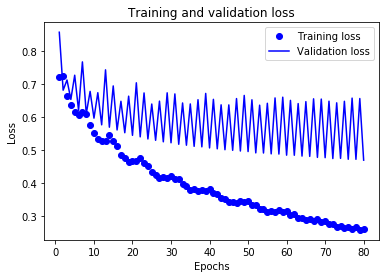

In [57]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

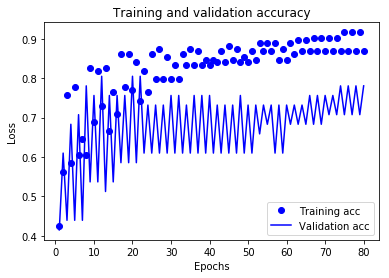

In [58]:
# Plotting the training and validation accuracy

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
evaluate = model.evaluate(feature_test,label_test)
print("loss",evaluate[0]*100)
print("Accuracy",evaluate[1]*100)

22/22 [==============================] - 0s 182us/sample - loss: 0.4121 - acc: 0.8182
loss 41.209203004837036
Accuracy 81.81818127632141


In [60]:
evaluate = model.evaluate(feature_train,label_train)
print("loss",evaluate[0]*100)
print("Accuracy",evaluate[1]*100)

144/144 [==============================] - 0s 69us/sample - loss: 0.2510 - acc: 0.9167
loss 25.095761319001515
Accuracy 91.66666865348816
